In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import mglearn
from sklearn.datasets import make_blobs


/home/igor/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


X.shape: (26, 2)


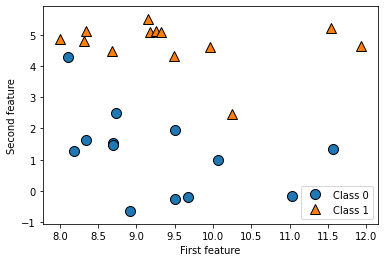

In [2]:
#Primer klasifikacije 

X,y = mglearn.datasets.make_forge() #Vraca 2 arraya (matricu i niz sa labelima)

#plot dataset

mglearn.discrete_scatter(X[:,0],X[:,1],y) #Feature 1, Feature 2, Label
plt.legend(["Class 0", "Class 1"])
plt.xlabel("First feature")
plt.ylabel("Second feature")

print("X.shape:", X.shape)

/home/igor/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


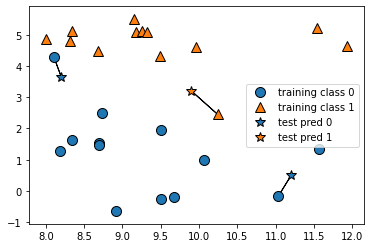

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors =1)

/home/igor/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


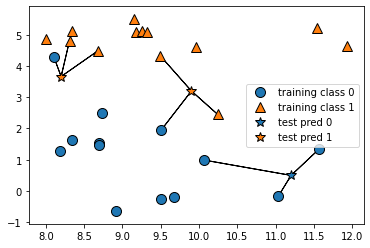

In [4]:
mglearn.plots.plot_knn_classification(n_neighbors = 3)

In [5]:
#Upotreba SCIKIT Learn KNN algoritma

from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

/home/igor/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [6]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)

In [7]:
#Training: Fit the classifier using the training set. Ovo znaci i cuvanje dataseta u ovom algoritmu za buduce predikcije.

clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
#Prediction

print("Test set predictions", clf.predict(X_test))

Test set predictions [1 0 1 0 1 0 0]


In [9]:
#Evaluation

print("Test set accuracy", clf.score(X_test, y_test)) #86% tacnost

Test set accuracy 0.8571428571428571


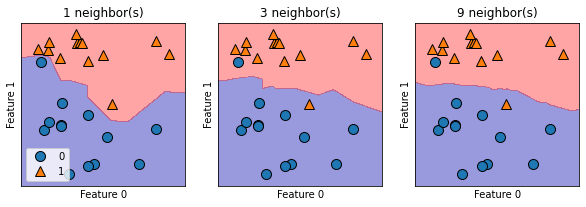

In [10]:
#Decision boundaries

fig, axes = plt.subplots(1,3,figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax = ax, alpha = 0.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    
axes[0].legend(loc = 3)

# LINEAR MODELS



In [ ]:
#LinearSVC vs Logistic Regression

/home/igor/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/home/igor/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


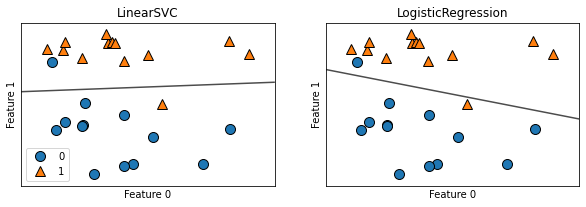

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

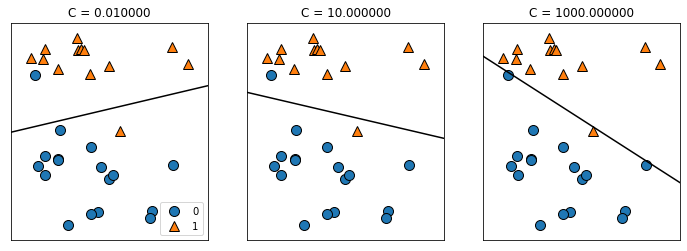

In [13]:
mglearn.plots.plot_linear_svc_regularization()

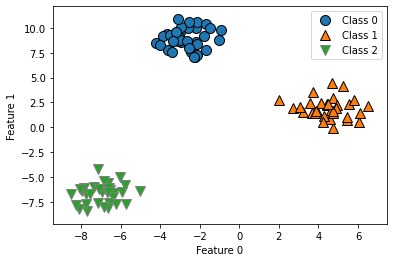

In [14]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [20]:
#Train Linearr SVC classifier

linear_svm = LinearSVC().fit(X,y)
print("Coefficient shape:", linear_svm.coef_.shape)
print("Intercept shape:", linear_svm.intercept_.shape)

Coefficient shape: (3, 2)
Intercept shape: (3,)


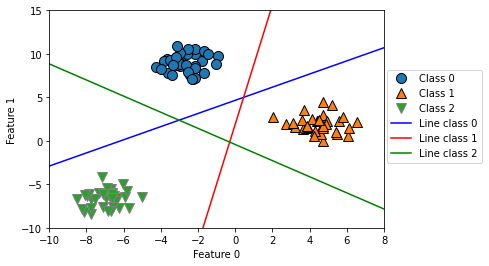

In [22]:
#Visuelisation

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
        ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
'Line class 2'], loc=(1.01, 0.3))

Text(0, 0.5, 'Feature 1')

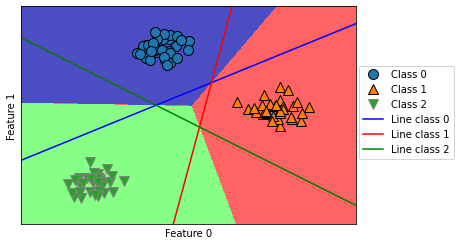

In [23]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
        ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")